In [1]:
# here i am going to do in sorted data by chatgpt as sorted data same as the level1

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib as mpt

In [3]:
df = pd.read_csv('../../datasrc/NepseDataHistorical1997_2024_sorted.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6088 entries, 0 to 6087
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SN          6088 non-null   int64  
 1   open        6088 non-null   object 
 2   high        6088 non-null   object 
 3   low         6088 non-null   object 
 4   close       6088 non-null   object 
 5   change      6088 non-null   float64
 6   pct_change  6088 non-null   float64
 7   turnover    6088 non-null   object 
 8   date        6088 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 428.2+ KB


In [5]:
# Remove the specified columns
df.drop(['SN', 'pct_change', 'change'], axis=1, inplace=True)

# Convert the 'open', 'high', 'low', 'close', and 'turnover' columns to numeric
# Assuming these columns contain comma as thousands separator and are in string format
numeric_columns = ['open', 'high', 'low', 'close', 'turnover']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')

# Convert the 'date' column to datetime format and set as index
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.set_index('date', inplace=True)

# Convert 'turnover' column to integer after handling missing values
# We assume that the missing values can be safely replaced with 0
df['turnover'] = df['turnover'].fillna(0).astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6088 entries, 1997-01-09 to 2024-01-01
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      6088 non-null   float64
 1   high      6088 non-null   float64
 2   low       6088 non-null   float64
 3   close     6088 non-null   float64
 4   turnover  6088 non-null   float64
dtypes: float64(5)
memory usage: 285.4 KB


In [7]:
df.tail(1000)

,open,high,low,close,turnover
date,,,,,
2019-07-29,1252.72,1259.69,1252.72,1255.98,3.508126e+08
2019-07-30,1256.01,1262.16,1256.01,1259.37,2.943050e+08
2019-07-31,1259.53,1267.73,1257.91,1265.57,3.700020e+08
2019-08-01,1177.87,1180.85,1177.15,1177.07,3.326270e+08
2019-08-04,1183.46,1197.88,1179.47,1191.68,8.641430e+08
...,...,...,...,...,...
2023-12-21,2148.16,2154.19,2103.46,2109.10,6.274325e+09
2023-12-24,2113.68,2131.63,2083.58,2088.07,7.111734e+09
2023-12-27,2089.88,2107.74,2055.63,2070.84,5.248783e+09


In [8]:
df = df.sort_index()

In [9]:
df.head()

,open,high,low,close,turnover
date,,,,,
1997-01-09,170.13,170.13,170.13,170.13,0.0
1997-01-10,170.20,170.20,170.20,170.20,0.0
1997-01-12,171.77,171.77,171.77,171.77,0.0
1997-02-09,170.20,170.20,170.20,170.20,0.0
1997-02-12,171.19,171.19,171.19,171.19,0.0


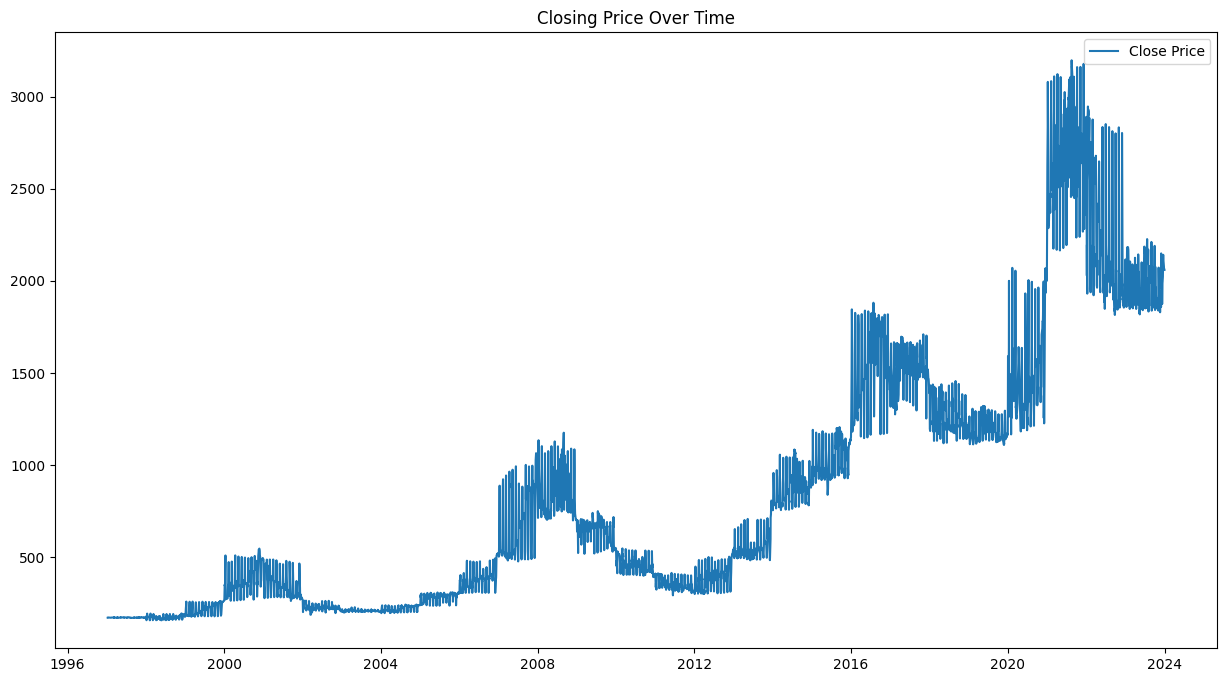

In [10]:
# importing the necessaries libraries 
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15, 8))
plt.plot(df['close'], label='Close Price')
plt.title('Closing Price Over Time')
plt.legend()
plt.show()

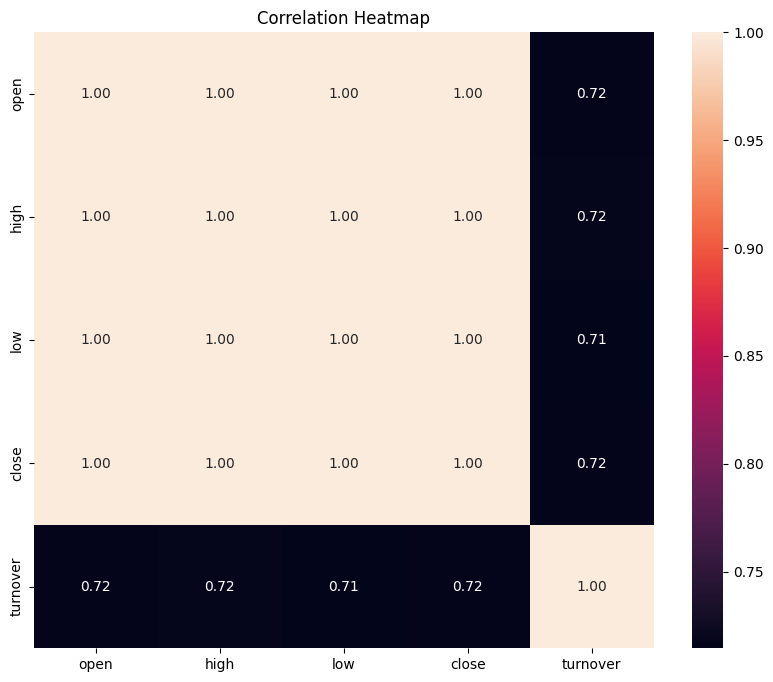

In [11]:
# Heatmap for correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

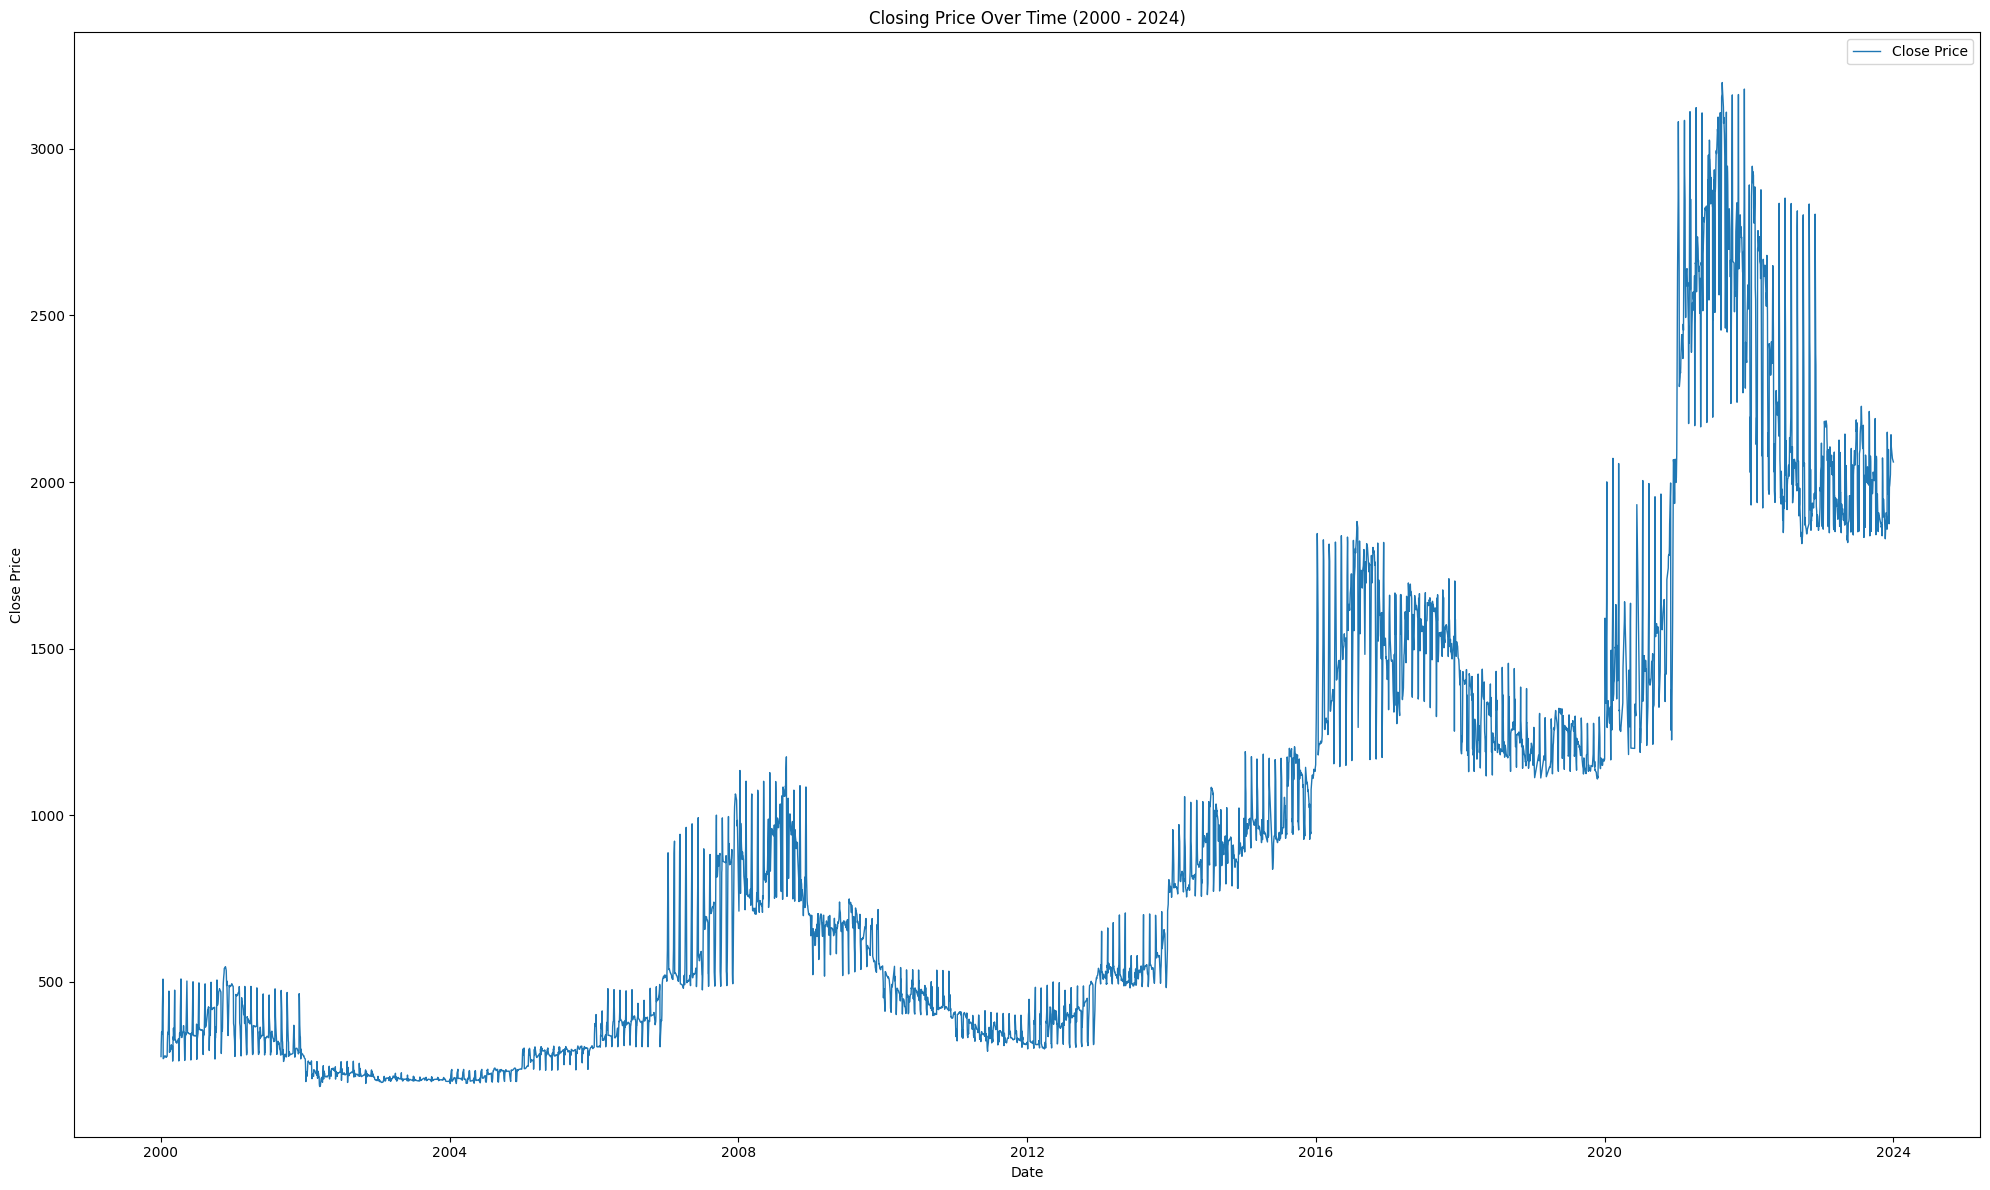

In [12]:
df_filtered = df.loc['2000-01-01':'2024-01-01']

# Plot the closing prices for the filtered date range
plt.figure(figsize=(20, 12))
plt.plot(df_filtered.index, df_filtered['close'], label='Close Price', linewidth=1)
plt.title('Closing Price Over Time (2000 - 2024)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
print(df.shape)
print(df.info())
print(df.isnull().sum())


(6088, 5)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6088 entries, 1997-01-09 to 2024-01-01
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      6088 non-null   float64
 1   high      6088 non-null   float64
 2   low       6088 non-null   float64
 3   close     6088 non-null   float64
 4   turnover  6088 non-null   float64
dtypes: float64(5)
memory usage: 414.4 KB
None
open        0
high        0
low         0
close       0
turnover    0
dtype: int64


In [14]:
print(df.describe())
print(df_filtered.describe()) #for the data after the filtered year i.e 2002 to 2024 jan1 

              open         high          low        close      turnover
count  6088.000000  6088.000000  6088.000000  6088.000000  6.088000e+03
mean    846.443448   850.385049   841.792147   845.834386  6.515118e+08
std     701.014519   707.257505   692.981111   699.597133  1.933739e+09
min     156.430000   156.430000   156.430000   156.430000  0.000000e+00
25%     296.980000   296.980000   296.980000   296.980000  0.000000e+00
50%     529.000000   529.000000   529.000000   529.000000  0.000000e+00
75%    1252.920000  1259.117500  1245.752500  1254.402500  3.164942e+08
max    3208.530000  3226.890000  3178.580000  3198.600000  2.164760e+10
              open         high          low        close      turnover
count  5559.000000  5559.000000  5559.000000  5559.000000  5.559000e+03
mean    908.832574   913.149199   903.738588   908.165490  7.135103e+08
std     702.355603   708.795988   694.026342   700.865562  2.012711e+09
min     186.220000   186.220000   186.220000   186.220000  0.000

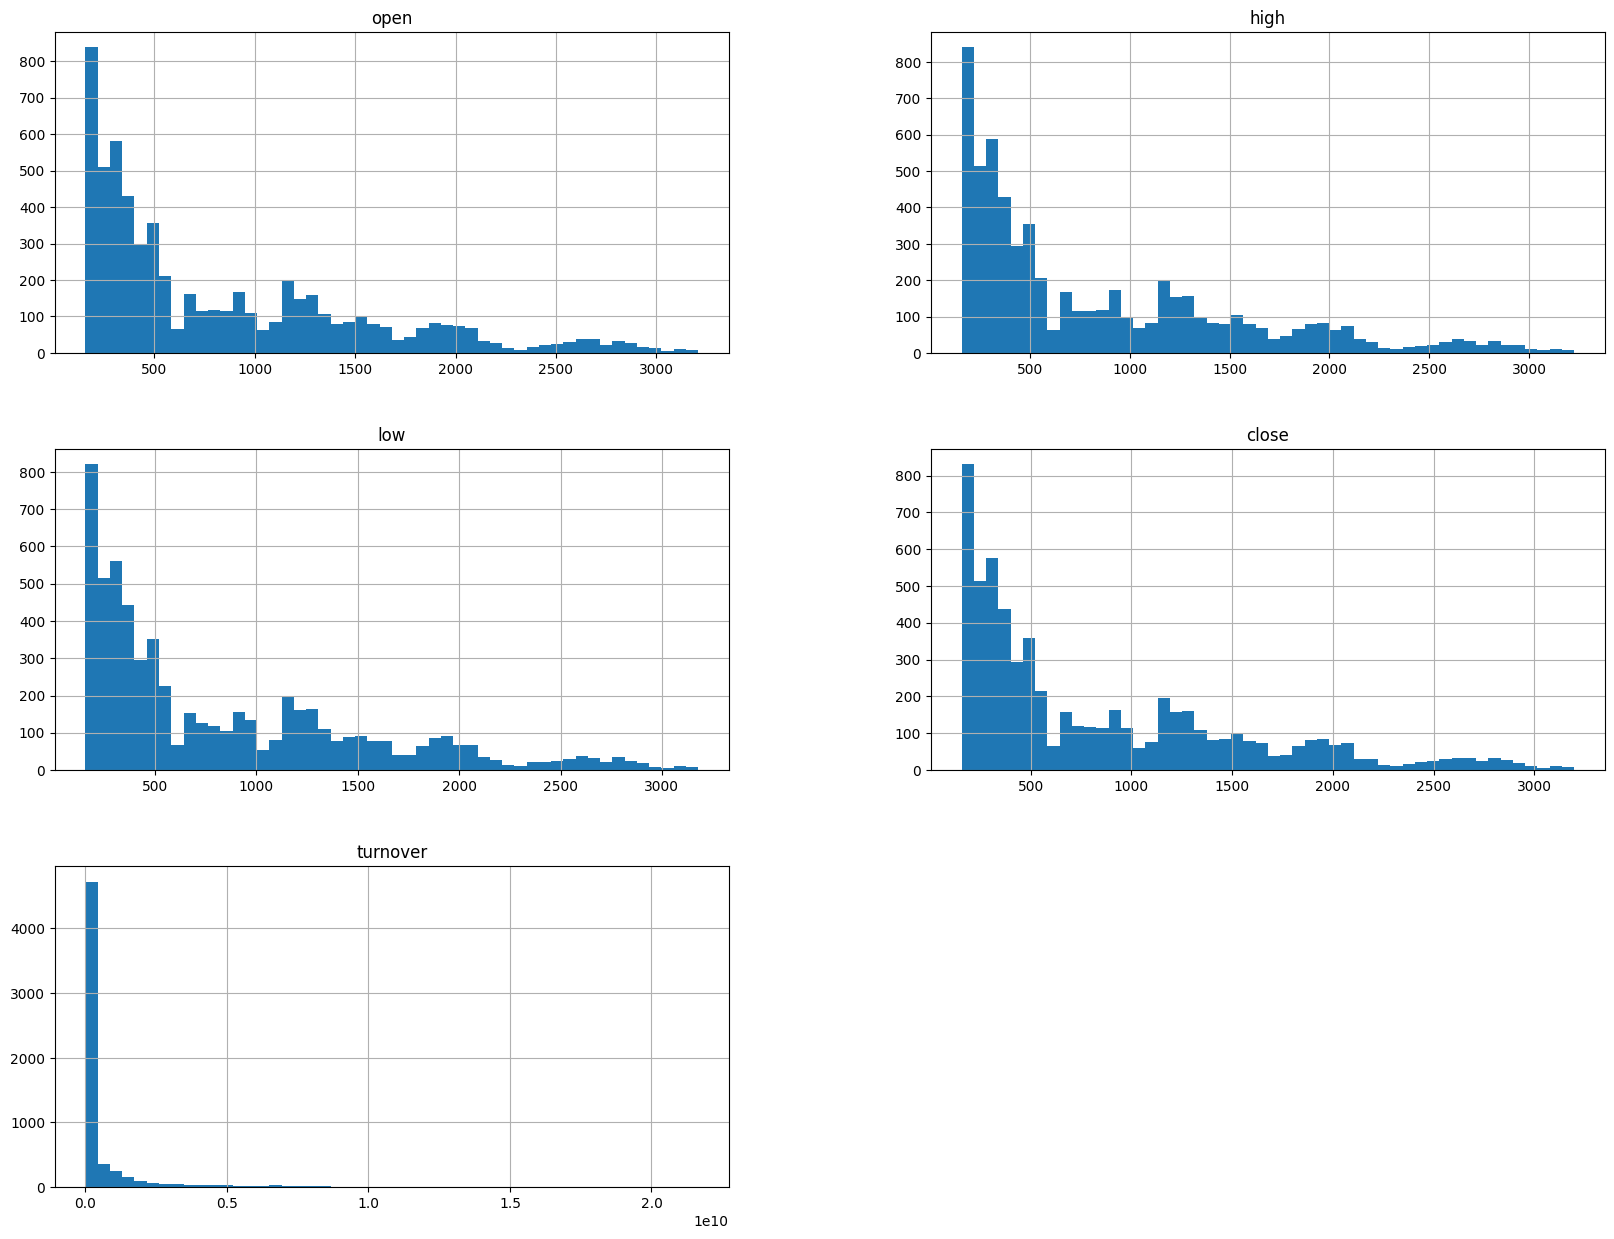

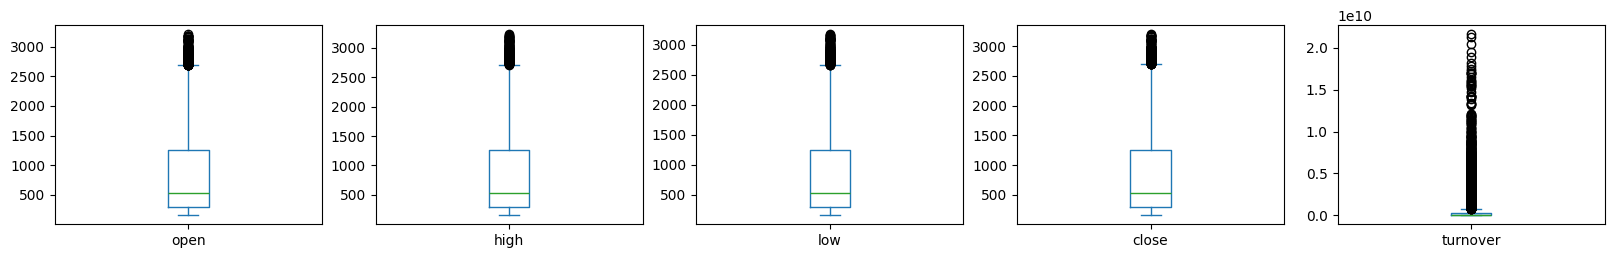

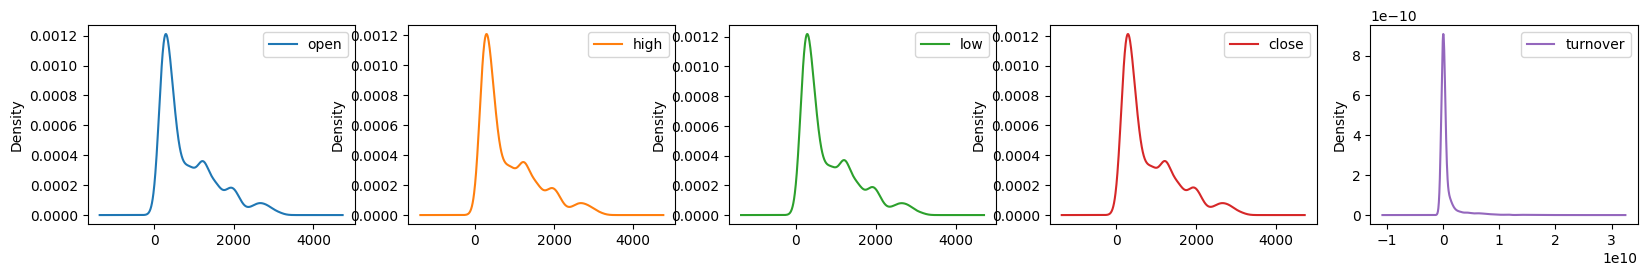

In [15]:
df.hist(figsize=(20, 15), bins=50)
plt.show()

df.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(20,15))
plt.show()

df.plot(kind='density', subplots=True, layout=(5,5), sharex=False, figsize=(20,15))
plt.show()


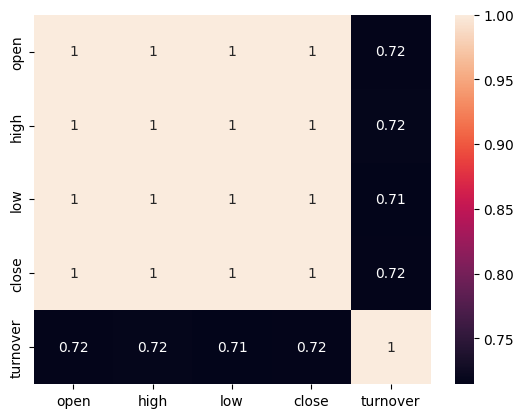

In [16]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()


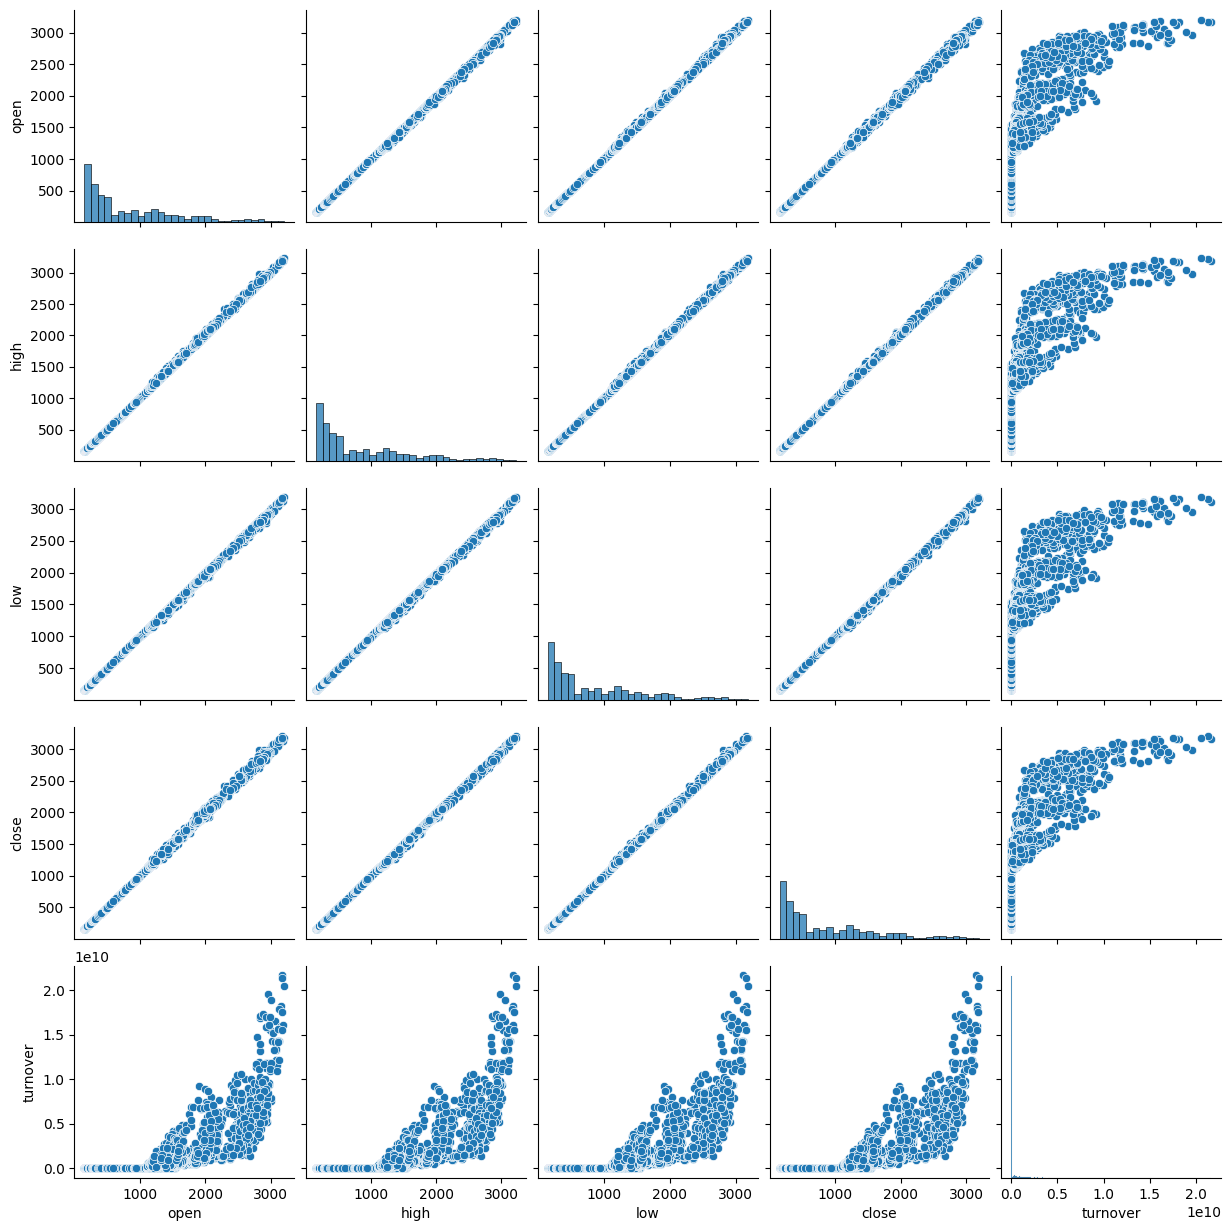

In [17]:
sns.pairplot(df)
plt.show()


In [18]:
# Resampling to weekly data with OHLC (Open-High-Low-Close)
wdf = df.resample('W-MON').agg({'open': 'first',
                                              'high': 'max',
                                              'low': 'min',
                                              'close': 'last',
                                              'turnover': 'sum'})

# Resampling to monthly data with OHLC
mdf = df.resample('M').agg({'open': 'first',
                                           'high': 'max',
                                           'low': 'min',
                                           'close': 'last',
                                           'turnover': 'sum'})


In [19]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 325 entries, 1997-01-31 to 2024-01-31
Freq: M
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      325 non-null    float64
 1   high      325 non-null    float64
 2   low       325 non-null    float64
 3   close     325 non-null    float64
 4   turnover  325 non-null    float64
dtypes: float64(5)
memory usage: 15.2 KB


In [20]:
mdf.head()

,open,high,low,close,turnover
date,,,,,
1997-01-31,170.13,171.77,170.13,171.77,0.0
1997-02-28,170.20,171.19,170.20,171.19,0.0
1997-03-31,171.52,173.44,168.74,170.08,0.0
1997-04-30,171.36,172.68,168.63,170.22,0.0
1997-05-31,171.16,173.03,169.80,173.03,0.0


In [21]:
mdf.tail()

,open,high,low,close,turnover
date,,,,,
2023-09-30,2171.46,2211.77,1829.00,2004.30,3.447885e+10
2023-10-31,2215.35,2277.35,1833.30,1864.40,2.397950e+10
2023-11-30,1845.65,2084.90,1816.68,1858.53,2.737974e+10
2023-12-31,2203.84,2235.49,1870.26,2068.90,8.039369e+10
2024-01-31,2072.45,2095.46,2057.12,2060.15,4.483982e+09


In [22]:
wdf.head()

,open,high,low,close,turnover
date,,,,,
1997-01-13,170.13,171.77,170.13,171.77,0.0
1997-01-20,NaN,NaN,NaN,NaN,0.0
1997-01-27,NaN,NaN,NaN,NaN,0.0
1997-02-03,NaN,NaN,NaN,NaN,0.0
1997-02-10,170.20,170.20,170.20,170.20,0.0


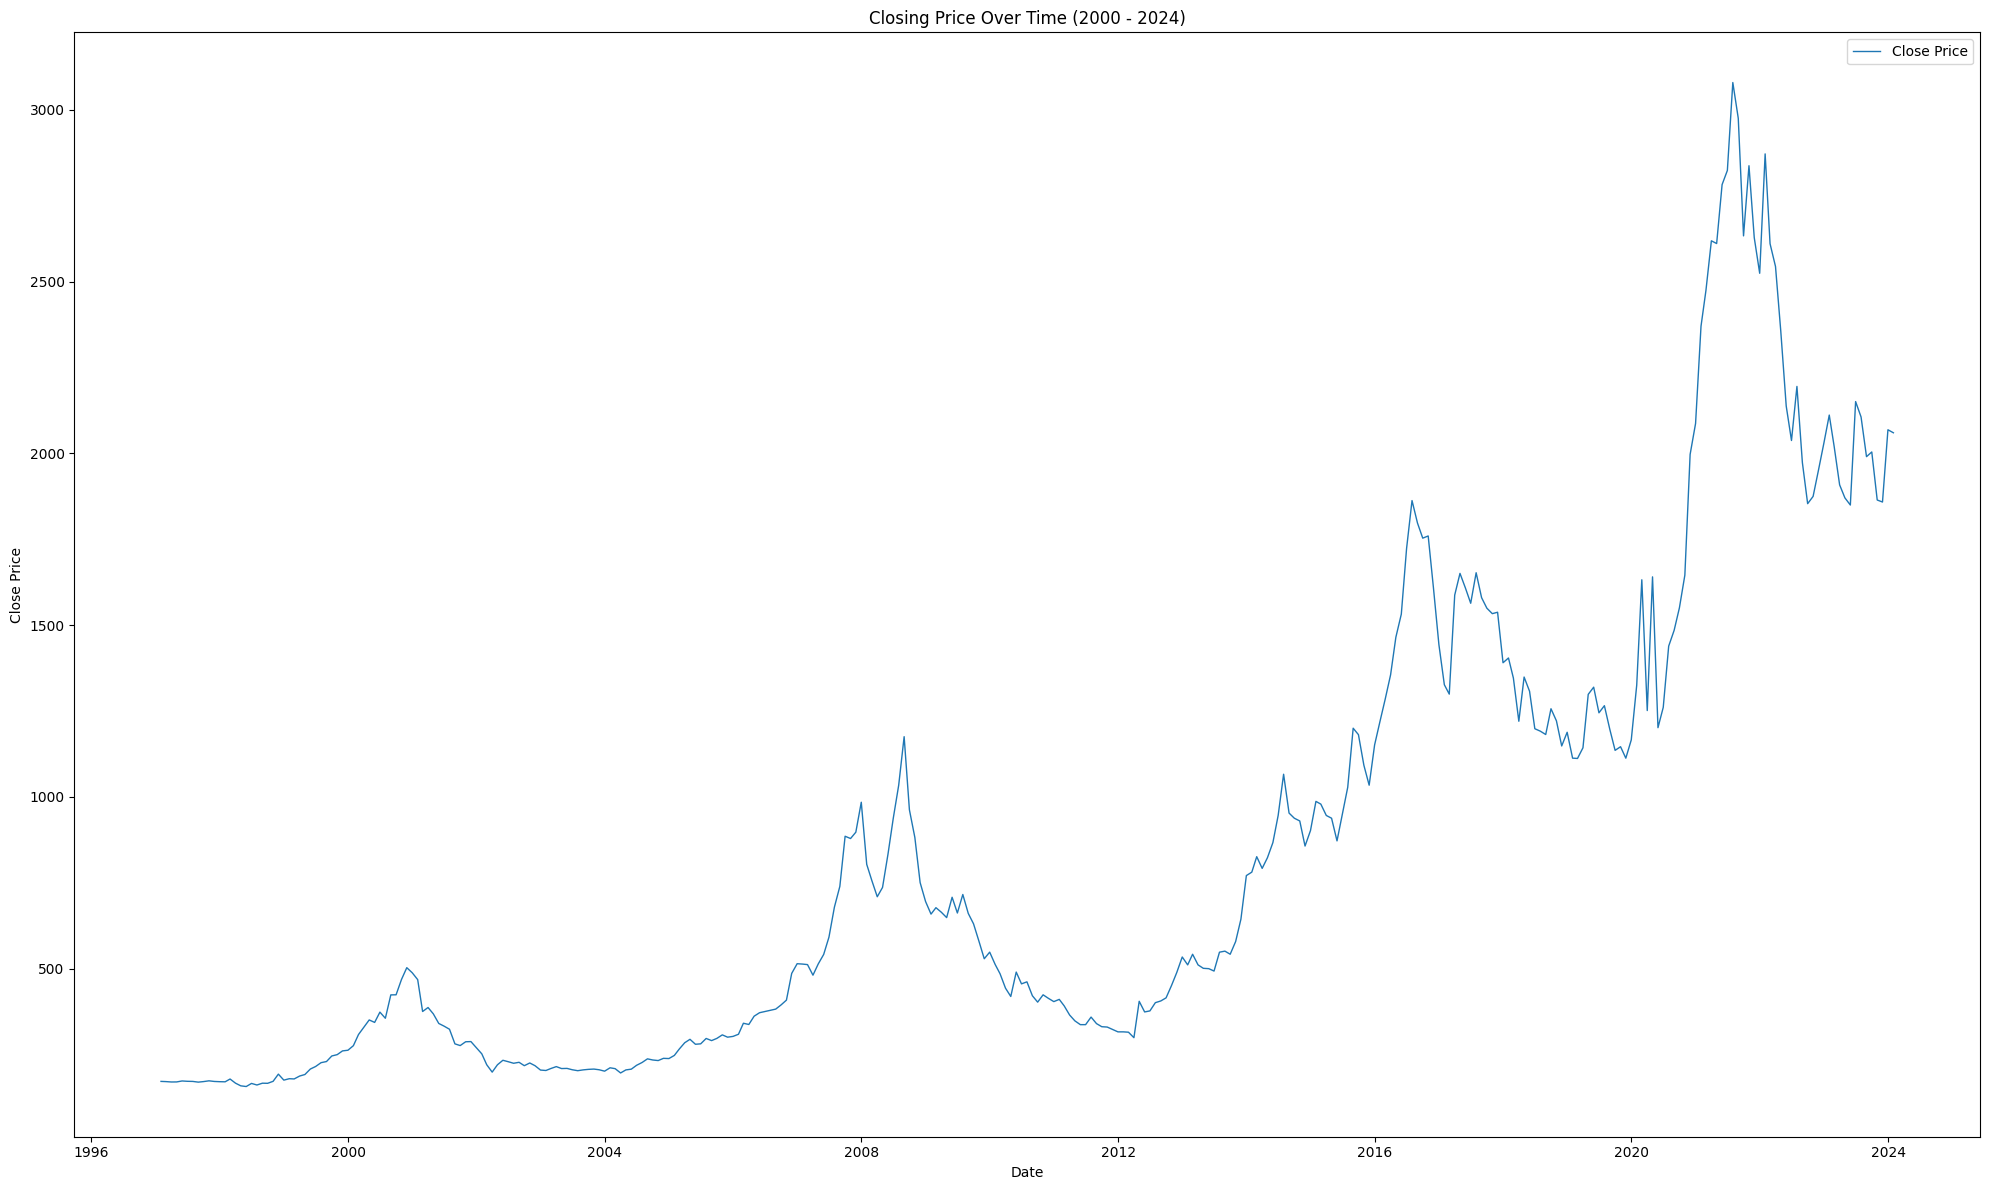

In [23]:

# Plot the closing prices for the filtered date range
plt.figure(figsize=(20, 12))
plt.plot(mdf.index, mdf['close'], label='Close Price', linewidth=1)
plt.title('Closing Price Over Time (2000 - 2024)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()
plt.show()

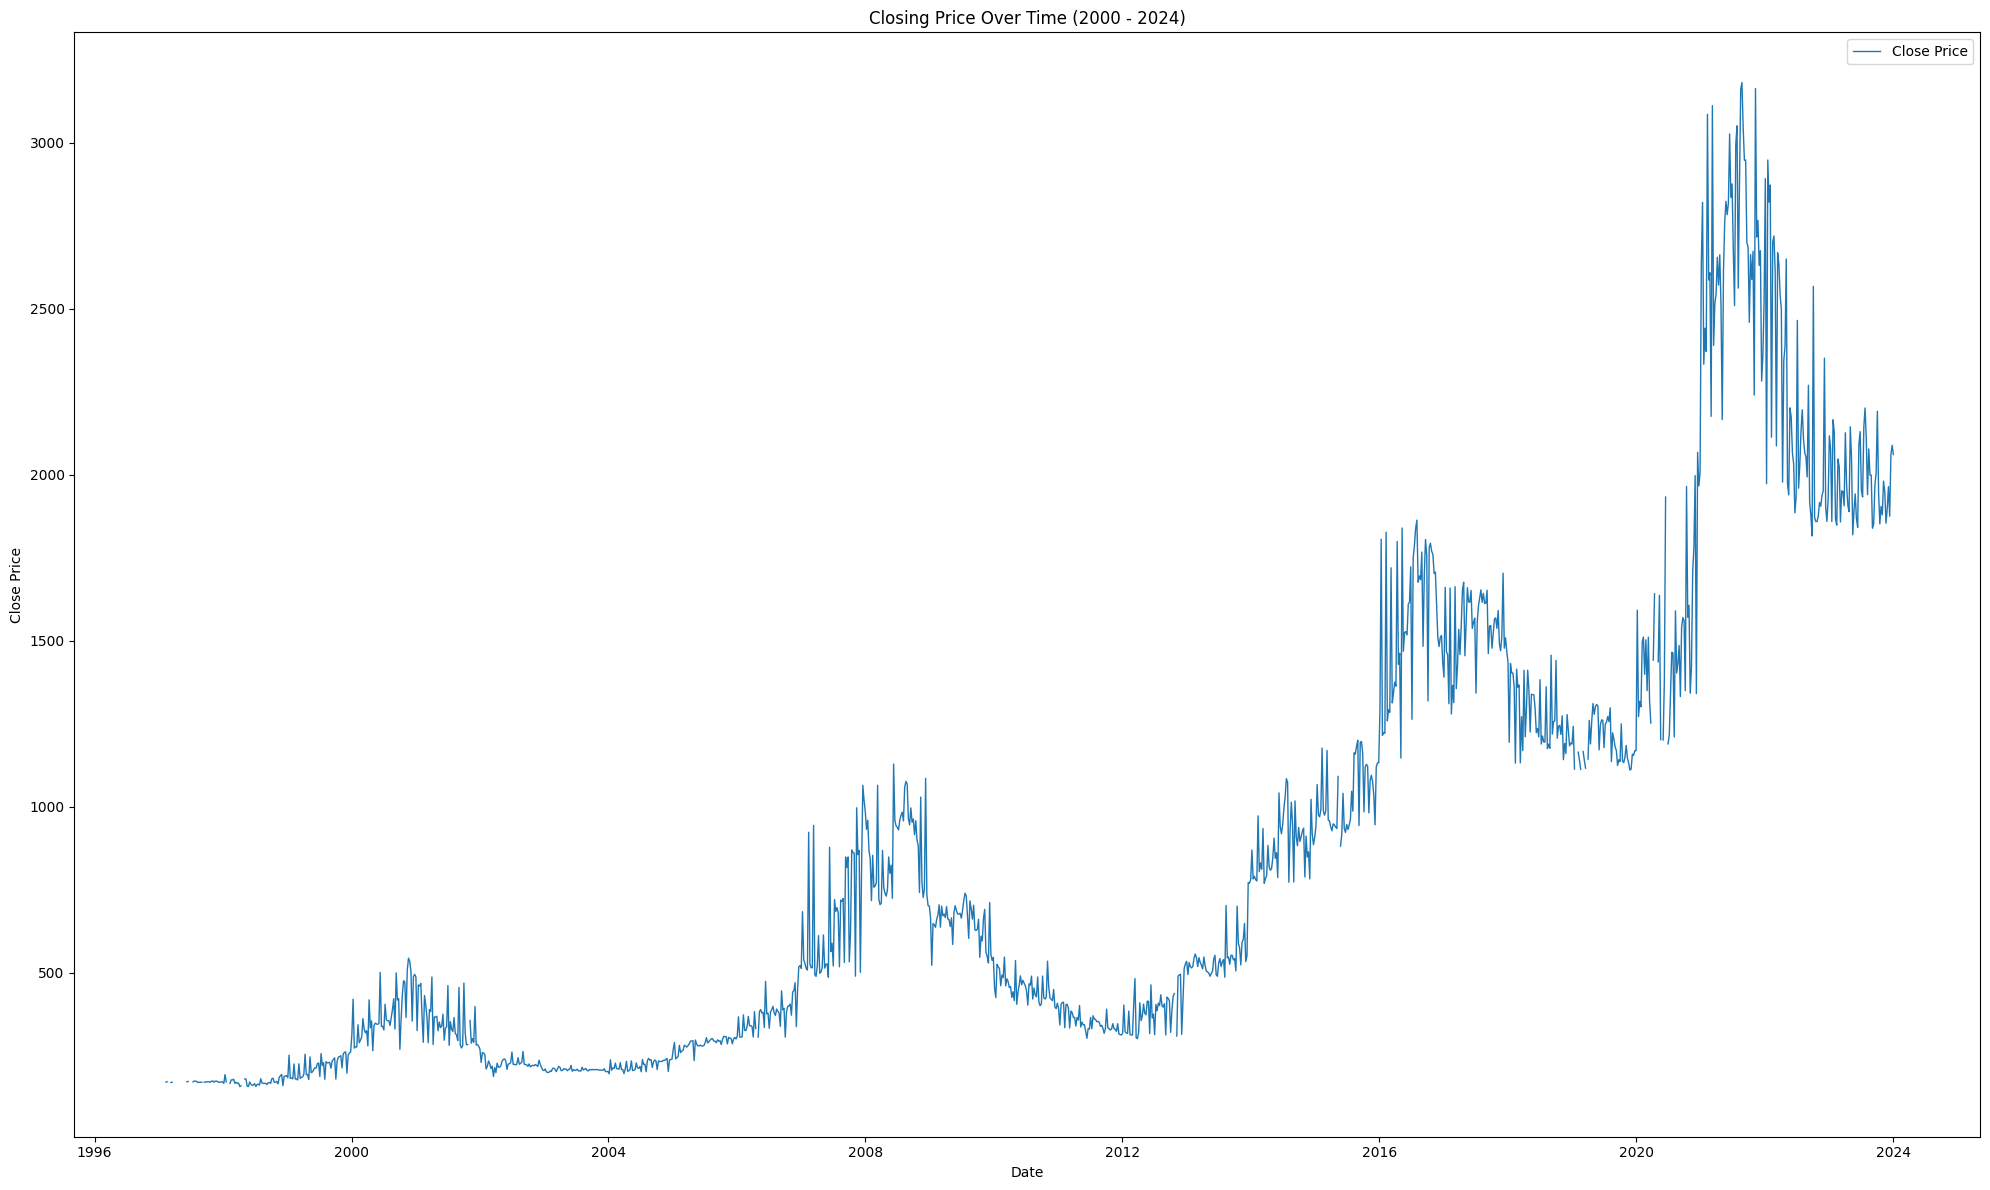

In [24]:

# Plot the closing prices for the filtered date range
plt.figure(figsize=(20, 12))
plt.plot(wdf.index, wdf['close'], label='Close Price', linewidth=1)
plt.title('Closing Price Over Time (2000 - 2024)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()
plt.show()

In [29]:
# Assuming 'mdf' is your monthly DataFrame and it has a 'close' column from which we want to calculate the changes
mdf_yrs_mth=mdf
# Create a column for year and month
mdf['Year'] = mdf.index.year
mdf['Month'] = mdf.index.month_name()

# Pivot the data to get a table with months as rows and years as columns
pivot_table = mdf.pivot_table(values='close', index='Month', columns='Year', aggfunc='last')

# Calculate the percentage change of 'close' price from the previous year
# percentage_change = pivot_table.pct_change(axis='columns') * 100

# The resulting 'percentage_change' DataFrame will have the structure you requested


In [30]:
mdf_yrs_mth

,open,high,low,close,turnover,Year,Month
date,,,,,,,
1997-01-31,170.13,171.77,170.13,171.77,0.000000e+00,1997,January
1997-02-28,170.20,171.19,170.20,171.19,0.000000e+00,1997,February
1997-03-31,171.52,173.44,168.74,170.08,0.000000e+00,1997,March
1997-04-30,171.36,172.68,168.63,170.22,0.000000e+00,1997,April
1997-05-31,171.16,173.03,169.80,173.03,0.000000e+00,1997,May
...,...,...,...,...,...,...,...
2023-09-30,2171.46,2211.77,1829.00,2004.30,3.447885e+10,2023,September
2023-10-31,2215.35,2277.35,1833.30,1864.40,2.397950e+10,2023,October
2023-11-30,1845.65,2084.90,1816.68,1858.53,2.737974e+10,2023,November


In [31]:
mdf_yrs_mth.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 325 entries, 1997-01-31 to 2024-01-31
Freq: M
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      325 non-null    float64
 1   high      325 non-null    float64
 2   low       325 non-null    float64
 3   close     325 non-null    float64
 4   turnover  325 non-null    float64
 5   Year      325 non-null    int32  
 6   Month     325 non-null    object 
dtypes: float64(5), int32(1), object(1)
memory usage: 19.0+ KB


In [32]:

mdf['Year'] = mdf.index.year
mdf['Month'] = mdf.index.strftime('%B')

# Then, we pivot the DataFrame to get years as columns and months as rows
pivot = mdf.pivot_table(values='close', index='Month', columns='Year', aggfunc='mean')

# Calculate the year-over-year percentage change without filling NA values
percentage_change = pivot.pct_change(axis=1, fill_method=None) * 100

# Prepare the percentage_change DataFrame for output
# Since applymap is deprecated, we will use apply with axis=None for elementwise operation
percentage_change_formatted = percentage_change.apply(lambda x: f'{x:.2f}%' if pd.notnull(x) else '', axis=None)

# The percentage_change_formatted DataFrame now contains the formatted percentage changes


C:\Users\hp\AppData\Local\Temp\ipykernel_9116\4076369978.py:9: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  percentage_change = pivot.pct_change(axis=1) * 100
C:\Users\hp\AppData\Local\Temp\ipykernel_9116\4076369978.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  percentage_change = percentage_change.applymap(lambda x: f'{x:.2f}%' if pd.notnull(x) else '')
